<a href="https://colab.research.google.com/github/youngchanseo/Hon.Gong.Machine-SNU/blob/main/(03_2_3)_%EB%8B%A4%ED%95%AD_%ED%9A%8C%EA%B7%80_p139.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# full code: https://bit.ly/hg-03-2
# raw data; http://bit.ly/perch_data
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split
#훈련세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)
#훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
lr= LinearRegression()
#선형 회귀 모델 훈련
lr.fit(train_input, train_target)
#50cm 농어에 대해 예측
print(lr.predict([[50]]))

[1241.83860323]


In [9]:
# 2차 방정식의 그래프를 그리기 위해서는 길이를 제곱한 항이 훈련세트에 추가되어야 함: np.column_stack
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

#train_input**2식에도 numpy boradcasting이 적용됨: 즉, rain_input에 있는 모든 원소를 제곱함.
print(train_poly.shape, test_poly.shape)


(42, 2) (14, 2)


원래 특성인 길이를 제곱하여 열에 추가했기 때문에, 훈련세트와 테스트 세트 모두 열이 2개로 늘어났음
2차 방
정식을 찾기 위해 훈련세트에 제곱 항을 추가했지만, target값은 그대로 사용함

In [11]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [12]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


무게 = 1.01* (길이^2) - 21.6 * 길이 +116.05

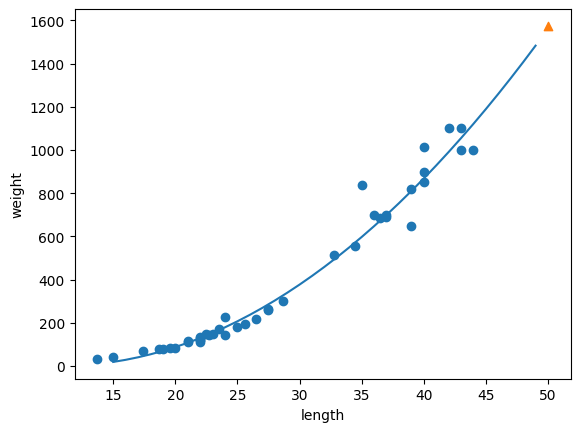

In [19]:
import matplotlib.pyplot as plt

#구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듦
point = np.arange(15,50)

#훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

#15에서 49까지 2차 방정식 그래프를 그림
plt.plot(point, 1.01*point**2 - 21.6*point +116.05)

#50 cm 농어 데이터
plt.scatter(50, 1574, marker ='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [21]:
#훈련세트와 테스트 세트의 R^2 점수를 평가
print(lr.score(train_poly, train_target))
print(lr.score(test_poly,test_target))

0.9706807451768623
0.9775935108325122


훈련세트와 테스트 세트에 대한 점수가 크게 높음
but, 훈련세트점수 < test set 점수 : 과소 적합
